In [124]:
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [45]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [46]:
df.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [47]:
df.dropna(inplace = True)

In [48]:
df_denmark = df[df['Country']=='Denmark']

In [49]:
df_denmark.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [50]:
new_df = df_denmark.drop(['AverageTemperatureUncertainty','City','Country','Latitude','Longitude'], axis = 'columns')
new_df.head()

,dt,AverageTemperature
0,1743-11-01,6.068
5,1744-04-01,5.788
6,1744-05-01,10.644
7,1744-06-01,14.051
8,1744-07-01,16.082


In [52]:
new_df.index = pd.to_datetime(new_df['dt'])

In [53]:
new_df = new_df.drop('dt', axis =1)
new_df.head()

,AverageTemperature
dt,
1743-11-01,6.068
1744-04-01,5.788
1744-05-01,10.644
1744-06-01,14.051
1744-07-01,16.082


In [90]:
new_df = new_df.sort_index()

In [91]:
new_df.head()

,AverageTemperature
dt,
1743-11-01,6.068
1743-11-01,6.068
1743-11-01,6.374
1743-11-01,6.374
1744-04-01,6.206


In [54]:
new_df.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [55]:
ts = new_df['AverageTemperature']

In [58]:
ts.head()

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
Name: AverageTemperature, dtype: float64

<Axes: xlabel='dt'>

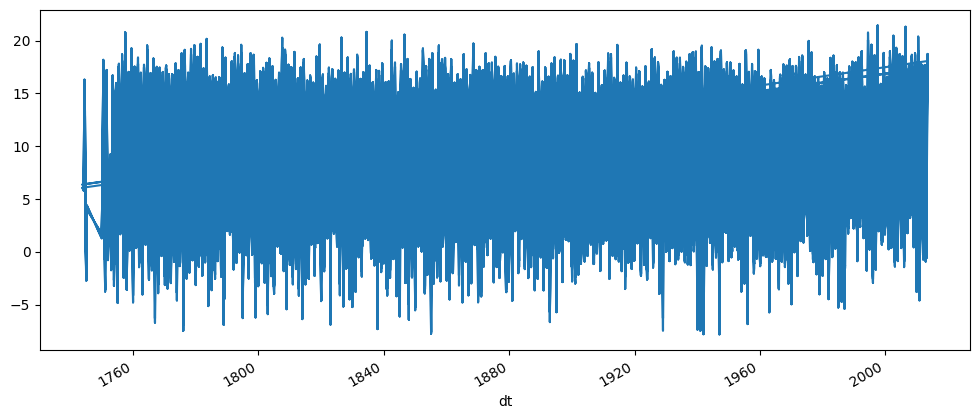

In [60]:
ts.plot()

# Test stationarity using adfuller test.

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
adfuller_result = adfuller(ts)
adfuller_result[1]

np.float64(2.3746970456360856e-27)

p-value < 0.05, so reject the null hypothesis.

So, ts is stationary

# Model creation

In [63]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
model = ARIMA(ts,order = (1,1,1))

In [67]:
fitted_model = model.fit()

In [104]:
pred = fitted_model.predict('01/01/1990','01/01/1991')

In [108]:
actual = new_df['1990-01-01':'1991-01-01'][:13]

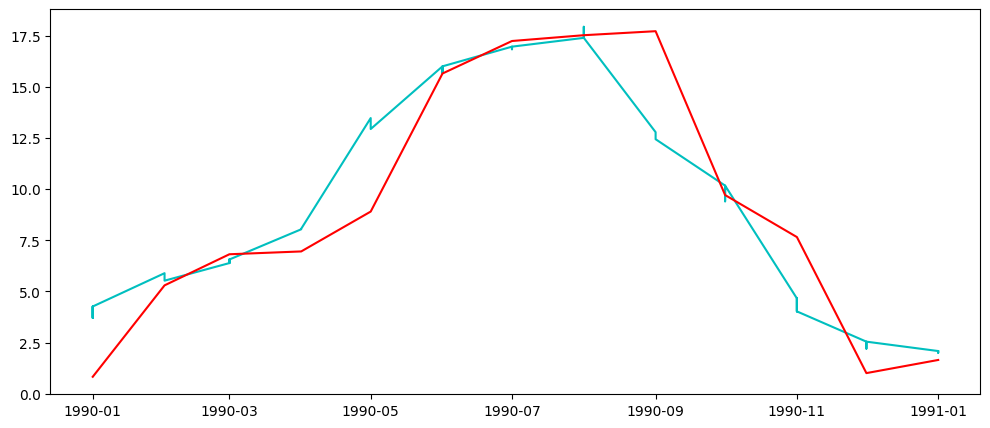

In [111]:
plt.plot(new_df['1990-01-01':'1991-01-01'], color = 'c')
plt.plot(pred, color = 'r')
plt.show()

# Evaluation

In [113]:
from sklearn.metrics import mean_absolute_percentage_error

In [115]:
mape = mean_absolute_percentage_error(actual,pred)
mape

1.0026375120286692